# Questão 1: Perceptron de Rosenblatt

## Problema

A representação de uma determinada mensagem digital ternária, isto é formada por três bits,
forma um cubo cujos vértices correspondem a mesma representação digital. Supondo que ao
transmitirmos esta mensagem a mesma possa ser contaminada por ruído formado em torno de
cada vértice uma nuvem esférica de valores aleatórios com raio máximo é 0.1 e mínimo de -0.1. 

## Objetivo

 Formular este problema como um problema de classificação de 8 padrões e treinar uma rede Perceptron de
Rosenblatt (Perceptron de camada única) para atuar como classificador/decodificador. 

Para esta solução será utilizado o [conjunto de treinamento](input_x.txt)
e o [conjunto de validação](output_y.txt).

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Metodologia  
Almeja-se implementar uma rede neural baseada no Perceptron de Rosenblatt, o qual está ilustrado na Figura abaixo. Para isso serão implementadas:

- Função de ativação Step com intervalo de classificação entre 1 e -1;
- Uma classe que representa a camada da rede neural;
- Uma classe que descreve a rede neural e suas funções: adicionar a camada, calcular o foward, predição, treinamento e avaliação.
- Pré-processamento dos dados;
- Chamada da rede neural e passagem dos dados de entrada e parâmetros da rede.

  <p align="center">
    <img src="img/perceptron.jpg">
  </p>
  

## Part 1 - Activation Function

Nesta Seção é implementada a função de ativação step, seus intervalos de classificação podem ser vistos na Figuras abaixo:

In [2]:
def step(x):
    return np.where(x>0,1,-1)


	 Step: Possui como saída o valor -1 ou 1


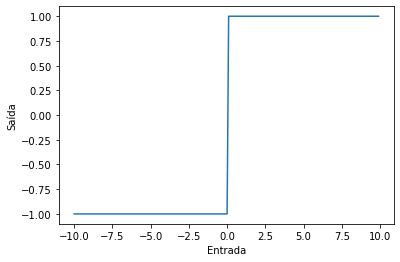

In [3]:
data_plot = np.arange(-10., 10., 0.1)
def plot_activ_funct(data_plot, func_type):
    func = []
    for i in range(len(data_plot)):
        func.append(step(data_plot[i]))

    plt.plot(data_plot,func)
    plt.xlabel('Entrada')
    plt.ylabel('Saída')
    plt.show()

print("\n\t Step: Possui como saída o valor -1 ou 1")
plot_activ_funct(data_plot, 'step')

## Part 2 - Layer and ANN Structure

### Layer Class

In [4]:
class Layer(object):
    def __init__(self, input_collumn, num_neurons=1, activation=step):
        self.input = None
        self.biases = np.random.randn(1, num_neurons)
        self.weights = np.random.randn(num_neurons, input_collumn)
        self.activation = activation
        self._activ_out = None

### __Foward

Como ilustrado na Figura 1, a saída do neurônio é calculada como sendo o somatório dos produtos entre as entradas e seus pesos. Adicionando o bias. Na função ______Foward__ este valor é passado para a função de ativação e conseguimos obter o valor da saída da camada e a entrada para a camada subsequentes, quando for o caso. 


$$
bias + \sum_{n=1}^{len(input)} input[n]* weight[n]
$$



### ANN Class


In [5]:
class ArtificialNeuralNetwork():
    def __init__(self):
        self.layers = []
        
    def add_layer(self, new_layer):
        self.layers.append(new_layer)
        
    def __forward(self, x):
        self.layers[0].input = x
        for current_layer, next_layer in zip(self.layers, self.layers[1:]+[Layer(0,0)]):
            y = np.dot(current_layer.input, current_layer.weights.T) + current_layer.biases
            current_layer._activ_out = current_layer.activation(y)
            next_layer.input = current_layer._activ_out
                
        return current_layer._activ_out
    
    def prediction(self, x):
        y_pred = []
        for i in x:
            y_pred.append(self.__forward(i)) 
        return np.array(y_pred)
        
    def fit(self, x, y, x_test, y_test, learning_rate=1e-3, epochs=100, plot=False):
        errors_train = []
        errors_test = []

        for epoch in range(epochs+1):
            error_epoch = []
            for x_i, y_i in zip(x, y):
                x_i =  x_i.reshape(1, x.shape[1])
                y_pred = self.__forward(x_i)
                
                erro = y_i - y_pred
                error_epoch.append(np.mean(np.abs(erro[0])))
                
                for layer in self.layers:
                    layer.weights += learning_rate * np.dot(erro.T, x_i)
                    layer.biases += learning_rate * erro[0]
            
            y_pred = self.prediction(x_test)
            soma = self.accuracy(y_pred, y_test)
            errors_test.append(1 - soma)
            errors_train.append(np.mean(error_epoch))
            
        return errors_train, errors_test
    
    
    def accuracy(self,y_pred, y, dtype=int):
        
        score = 0
        total = 1/y.shape[0]
        y_pred = y_pred.astype(dtype)
        y = y.astype(dtype)

        for y_i, y_pred_i in zip(y,y_pred):
            if np.array_equal(y_i,y_pred_i[0]):
                score+=1

        return score*total

## Part 1 - Data Preprocessing

### Importing the dataset

In [6]:
x = []
y = []

x= np.loadtxt('input_x.txt', dtype=float, delimiter=',', encoding='bytes')
y= np.loadtxt('output_y.txt', dtype=float, delimiter=',', encoding='bytes')

### Splitting the dataset into the Training set and Test set

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## Part 2: Building the Artificial Neural Network (ANN)

In [8]:
ann=ArtificialNeuralNetwork()
ann.add_layer(Layer(input_collumn=x.shape[1], num_neurons=y.shape[1], activation=step))

## Part 3 - Training the ANN

In [9]:
errors_train, errors_valid = ann.fit(x_train, y_train, x_test, y_test, learning_rate=0.01 , epochs=25, plot=True)

## Part 4 - Making the predictions and evaluating the model  

### Predicting the Test set results

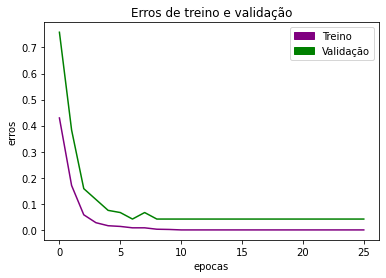

Erro treino:  [0.4294642857142857, 0.1705357142857143, 0.05803571428571429, 0.027678571428571427, 0.01607142857142857, 0.013392857142857142, 0.008035714285714285, 0.008035714285714285, 0.0026785714285714286, 0.0017857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Erro validacao: [0.7583333333333333, 0.3833333333333333, 0.15833333333333333, 0.1166666666666667, 0.07500000000000007, 0.06666666666666665, 0.04166666666666663, 0.06666666666666665, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663, 0.04166666666666663]


In [17]:
def plot_error(data=[], label=['', ''], color=['purple', 'green']):
    plt.title("Erros de treino e validação")
    plt.xlabel("epocas")
    plt.ylabel("erros")
    plt.legend(handles=[mpatches.Patch(color=color[0], label=label[0]),
                        mpatches.Patch(color=color[1], label=label[1])])
    plt.plot(data[0], c=color[0])
    plt.plot(data[1], c=color[1])
    plt.show()
    print("Erro treino: ", data[0])
    print("\nErro validacao:", data[1])

plot_error([errors_train, errors_valid], ["Treino", "Validação"])